<a href="https://colab.research.google.com/github/lblogan14/master_tensorflow_keras/blob/master/ch4_ml_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Regression
  * Simple linear regression
  * Multi regression
  * Regularized regression
  * Lasso regularization
  * Ridge regularization
  * ElasticNet regularization

* Classification
  * Classification using logistic regression
  * Binary classification
  * Multiclass classification

In [1]:
import tensorflow as tf
print('TensorFlow:{}'.format(tf.__version__))
tf.set_random_seed(42)

import numpy as np
print('NumPy:{}'.format(np.__version__))

import matplotlib.pyplot as plt

import sklearn as sk
print('Scikit-Learn:{}'.format(sk.__version__))

from sklearn import model_selection as skms
from sklearn import datasets as skds
from sklearn import preprocessing as skpp

TensorFlow:1.12.0-rc2
NumPy:1.14.6
Scikit-Learn:0.19.2


#Simple linear regression
##Data preparation


In [0]:
from sklearn import datasets as skds
X, y = skds.make_regression(n_samples=200,
                           n_features=1,
                           n_informative=1,
                           n_targets=1,
                           noise=20.0)

The function
generates *y* with a one-dimensional NumPy Array; thus, we reshape *y* to have two
dimensions:

In [0]:
if (y.ndim == 1):
  y = y.reshape(len(y), 1)

Text(0.5,1,'Original Dataset')

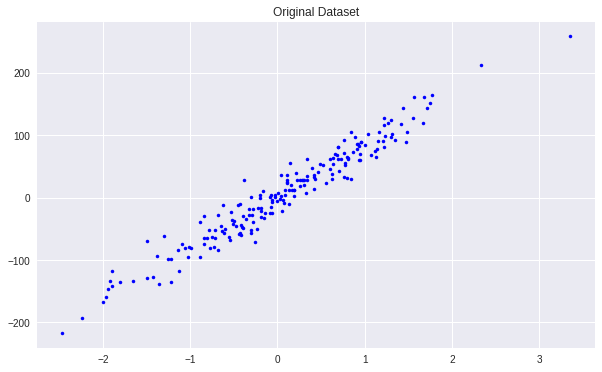

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.')
plt.title('Original Dataset')

Divide dataset into trainning and testing sets,

In [0]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y,
                                                        test_size=0.4,
                                                        random_state=42)

##Defining intputs, parameters, etc..

In [0]:
num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

x_tensor = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name='x')
y_tensor = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name='y')

w = tf.Variable(tf.zeros([num_inputs, num_outputs]), dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]), dtype=tf.float32, name='b')

##Defining model

In [0]:
model = tf.matmul(x_tensor, w) + b

##Defining loss function
assume we use **mean square error** (MSE) as the loss function

In [0]:
loss = tf.reduce_mean(tf.square(model - y_tensor))
# mse function
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
# r-squared function
rs = 1 - tf.div(unexplained_error, total_error)

##Defining optimizer function

In [0]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

##Training 

In [0]:
num_epochs = 1500
w_hat = 0
b_hat = 0
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0
rs_score = 0

In [13]:
with tf.Session() as tfs:
  tfs.run(tf.global_variables_initializer())
  for epoch in range(num_epochs):
    feed_dict = {x_tensor:X_train, y_tensor: y_train}
    loss_val, _ = tfs.run([loss, optimizer], feed_dict=feed_dict)
    loss_epochs[epoch] = loss_val
    
    feed_dict_test = {x_tensor:X_test, y_tensor:y_test}
    mse_score, rs_score = tfs.run([mse, rs], feed_dict=feed_dict_test)
    mse_epochs[epoch] = mse_score
    rs_epochs[epoch] = rs_score
    
  w_hat, b_hat = tfs.run([w, b])
  w_hat = w_hat.reshape(1)

print('model: Y = {0:.8f} X + {1:.8f}'.format(w_hat[0], b_hat[0]))
print('For test data : MSE = {0:.8f}, R-Squared = {1:.8f}'.format(mse_score, rs_score))

model: Y = 82.84402466 X + -0.14254379
For test data : MSE = 349.21035767, R-Squared = 0.91148281


Plot the interpolation,

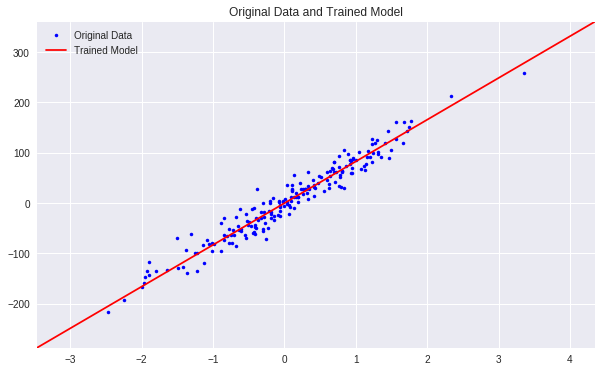

In [14]:
plt.figure(figsize=(10, 6))
x_plot = [np.min(X) - 1, np.max(X) + 1]
y_plot = w_hat * x_plot + b_hat
plt.axis([x_plot[0], x_plot[1], y_plot[0], y_plot[1]])
plt.plot(X, y, 'b.', label='Original Data')
plt.plot(x_plot, y_plot, 'r-', label='Trained Model')
plt.title('Original Data and Trained Model')
plt.legend()

Plot the MSE for training and testing data in each iteration

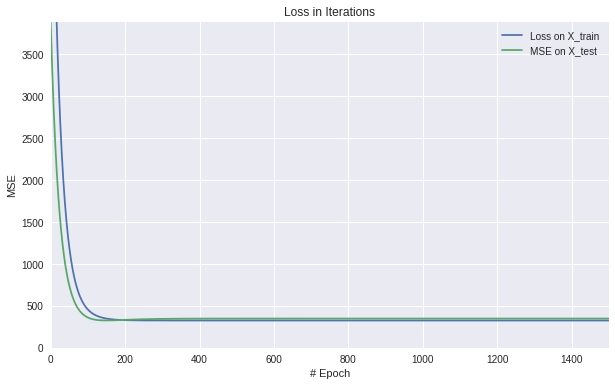

In [15]:
plt.figure(figsize=(10, 6))

plt.axis([0, num_epochs, 0, np.max(loss_epochs)])
plt.plot(loss_epochs, label='Loss on X_train')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('MSE')

plt.axis([0, num_epochs, 0, np.max(mse_epochs)])
plt.plot(mse_epochs, label='MSE on X_test')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.legend()

The plot shown above shows that MSE reduces and then remains at the same level near 200.

Plot R-Square,

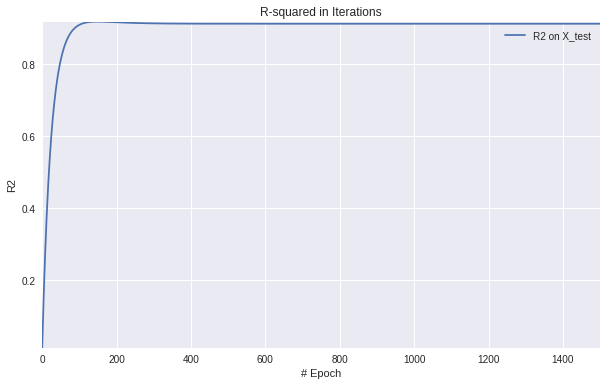

In [16]:
plt.figure(figsize=(10, 6))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

#Multi-regression
##Boston Dataset

In [17]:
boston = skds.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [0]:
X = boston.data.astype(np.float32)
y = boston.target.astype(np.float32)
if (y.ndim) == 1:
  y = y.reshape(-1, 1)

# normalize inputs
X = skpp.StandardScaler().fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.4,random_state=42)
print(X_train.shape)

(303, 13)


##Simple Multi Regression

In [0]:
num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

tf.reset_default_graph()

x_tensor = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name='x')
y_tensor = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name='y')

w = tf.Variable(tf.zeros([num_inputs, num_outputs]), dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]), dtype=tf.float32, name='b')

model = tf.matmul(x_tensor, w) + b

In [0]:
loss = tf.reduce_mean(tf.square(model - y_tensor))
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

In [0]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [0]:
num_epochs = 1500
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0.0
rs_score = 0.0

In [28]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict)
        loss_epochs[epoch] = loss_val

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rs_score = tfs.run([mse, rs], feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rs_score

print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(mse_score, rs_score))

For test data : MSE = 24.75711441, R2 = 0.67400652 


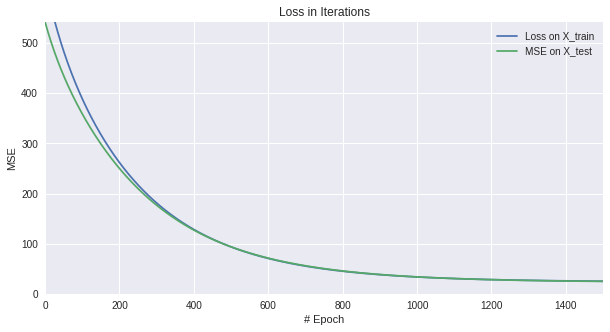

In [30]:
plt.figure(figsize=(10, 5))

plt.axis([0, num_epochs, 0, np.max(loss_epochs)])
plt.plot(loss_epochs, label='Loss on X_train')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('MSE')

plt.axis([0, num_epochs, 0, np.max(mse_epochs)])
plt.plot(mse_epochs, label='MSE on X_test')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.legend()

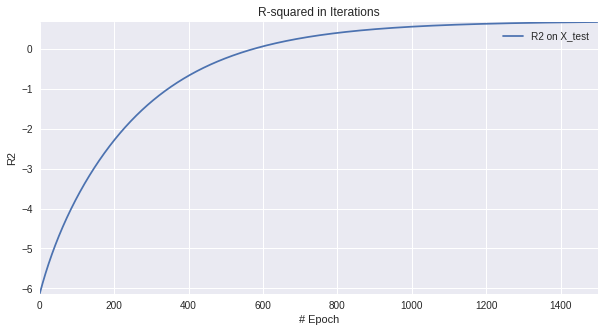

In [31]:
plt.figure(figsize=(10, 5))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

#Regularized regression
Add *regularzation* term to avoid overfitting
* **Lasso regression**, L1 regularization
$$\frac{1}{n}\sum\limits_{i=1}^{n}(y_i-\hat{y_i})^2+\alpha\frac{1}{n}\sum\limits_{i=1}^{n}|w_i|$$
* **Ridge regression**, L2 regularization
$$\frac{1}{n}\sum\limits_{i=1}^{n}(y_i-\hat{y_i})^2+\alpha\frac{1}{n}\sum\limits_{i=1}^{n}|w_i|^2$$
* **ElasticNet regression**,
$$\frac{1}{n}\sum\limits_{i=1}^{n}(y_i-\hat{y_i})^2+\alpha_1\frac{1}{n}\sum\limits_{i=1}^{n}|w_i|+\alpha_2\frac{1}{n}\sum\limits_{i=1}^{n}|w_i|^2$$

Lasso is used when we want to remove some features. Trade off between computation time and accuracy.

##Lasso Regularization

In [0]:
tf.reset_default_graph()

num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

x_tensor = tf.placeholder(dtype=tf.float32,
                          shape=[None, num_inputs], name='x')
y_tensor = tf.placeholder(dtype=tf.float32,
                          shape=[None, num_outputs], name='y')

w = tf.Variable(tf.zeros([num_inputs, num_outputs]),
                dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]),
                dtype=tf.float32, name='b')

model = tf.matmul(x_tensor, w) + b

In [0]:
# add lasso regularization
lasso_param = tf.Variable(0.8, dtype=tf.float32)
lasso_loss = tf.reduce_mean(tf.abs(w)) * lasso_param

loss = tf.reduce_mean(tf.square(model - y_tensor)) + lasso_loss

In [0]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

In [0]:
num_epochs = 1500
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0.0
rs_score = 0.0

In [36]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val,_ = tfs.run([loss,optimizer], feed_dict)
        loss_epochs[epoch] = loss_val

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score,rs_score = tfs.run([mse,rs], feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rs_score

print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rs_score))

For test data : MSE = 24.78202629, R2 = 0.67367852 


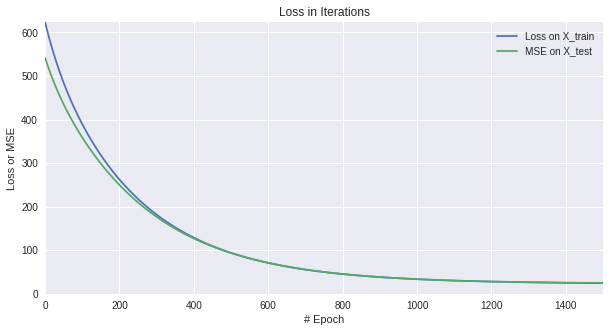

In [37]:
plt.figure(figsize=(10, 5))

plt.axis([0, num_epochs, 0, np.max([loss_epochs, mse_epochs])])
plt.plot(loss_epochs, label='Loss on X_train')
plt.plot(mse_epochs, label='MSE on X_test')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('Loss or MSE')
plt.legend()

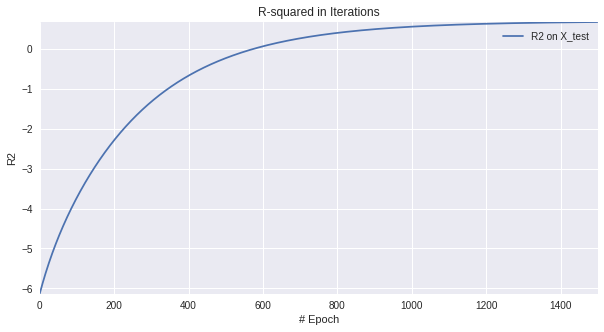

In [38]:
plt.figure(figsize=(10, 5))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()


##Ridge regularization

In [0]:
tf.reset_default_graph()

num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

x_tensor = tf.placeholder(dtype=tf.float32,
                          shape=[None, num_inputs], name='x')
y_tensor = tf.placeholder(dtype=tf.float32,
                          shape=[None, num_outputs], name='y')

w = tf.Variable(tf.zeros([num_inputs, num_outputs]),
                dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]),
                dtype=tf.float32, name='b')

model = tf.matmul(x_tensor, w) + b

In [0]:
# add ridge regularization
ridge_param = tf.Variable(0.8, dtype=tf.float32)
ridge_loss = tf.reduce_mean(tf.square(w)) * ridge_param

loss = tf.reduce_mean(tf.square(model - y_tensor)) + ridge_loss

learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

In [0]:
num_epochs = 1500
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0.0
rs_score = 0.0

In [42]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict=feed_dict)
        loss_epochs[epoch] = loss_val

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rs_score = tfs.run([mse, rs], feed_dict=feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rs_score

print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rs_score))

For test data : MSE = 25.37208939, R2 = 0.66590875 


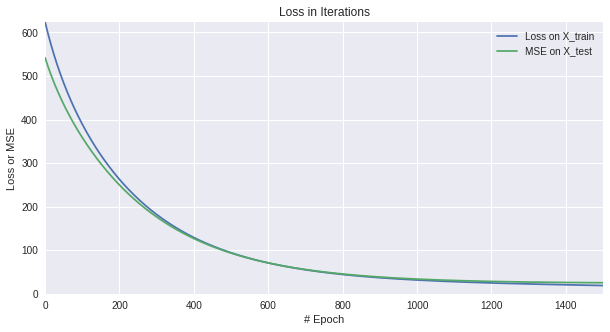

In [43]:
plt.figure(figsize=(10, 5))

plt.axis([0, num_epochs, 0, np.max([loss_epochs, mse_epochs])])
plt.plot(loss_epochs, label='Loss on X_train')
plt.plot(mse_epochs, label='MSE on X_test')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('Loss or MSE')
plt.legend()

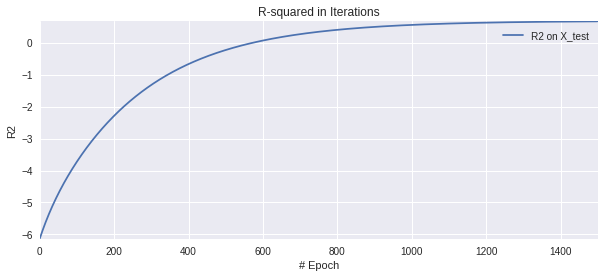

In [44]:
plt.figure(figsize=(10, 4))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

##ElasticNet regularization

In [0]:
tf.reset_default_graph()

num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

x_tensor = tf.placeholder(dtype=tf.float32,
                          shape=[None, num_inputs], name='x')
y_tensor = tf.placeholder(dtype=tf.float32,
                          shape=[None, num_outputs], name='y')

w = tf.Variable(tf.zeros([num_inputs, num_outputs]),
                dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]),
                dtype=tf.float32, name='b')

model = tf.matmul(x_tensor, w) + b

In [0]:
# implement elastic_net
ridge_param = tf.Variable(0.8, dtype=tf.float32)
ridge_loss = tf.reduce_mean(tf.square(w)) * ridge_param
lasso_param = tf.Variable(0.8, dtype=tf.float32)
lasso_loss = tf.reduce_mean(tf.abs(w)) * lasso_param

loss = tf.reduce_mean(tf.square(model - y_tensor)) + \
    ridge_loss + lasso_loss

learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


In [0]:
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

In [52]:
num_epochs = 1500
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0.0
rs_score = 0.0

with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict=feed_dict)
        loss_epochs[epoch] = loss_val

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rs_score = tfs.run([mse, rs], feed_dict=feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rs_score

print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rs_score))

For test data : MSE = 25.40725708, R2 = 0.66544569 


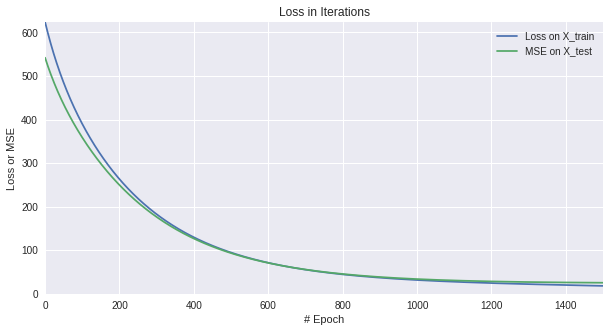

In [53]:
plt.figure(figsize=(10, 5))

plt.axis([0, num_epochs, 0, np.max([loss_epochs, mse_epochs])])
plt.plot(loss_epochs, label='Loss on X_train')
plt.plot(mse_epochs, label='MSE on X_test')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('Loss or MSE')
plt.legend()

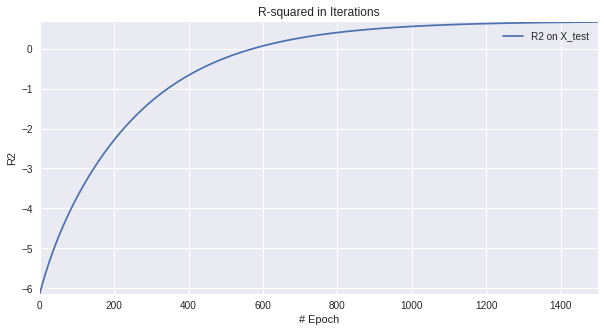

In [54]:
plt.figure(figsize=(10, 5))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

#Classification using logistic regression
Logistic regression is a probabilistic and linear classifier.

The probability that vector of input features is a member of a specific class is defined as,
$$P(Y=i|x,w,b)=\phi(z)$$
* $Y$, output
* $i$, one of the classes
* $x$, inputs
* $w$, weights
* $b$, biases
* $z$, logits, $z=w\times x+b$
* $\phi$, smoothing function

##Logistic regression for binary classification
$\phi(z)$ is the sigmoid function,
$$\phi(z)=\frac{1}{1+e^{-z}}=\frac{1}{1+e^{-(w\times x+b)}}$$
The objective is to maxmize the likelihood,
$$L(w)=P(y|x,w,b)$$
Easier to minimize the negative log-likelihood using optimization algorithms, so the loss function for binary logistic regression is defined as,
$$J(w)=-\sum\limits_{i=1}^{n}[(y_i\times \log(\phi(z_i)))+((1-y_i)\times(1-\log(\phi(z_i))))]$$

##Logistic regression for multiclass classification
$$softmax \phi_i(z)=\frac{e_i^z}{\sum\limits_je_j^z}=\frac{e_i^{(w\times x+b)}}{\sum\limits_je_j^{(w\times x+b)}}$$
Softmax function produces the probabilities for each class, and the probabilities vector adds
to 1.

The loss function for multinomial logistic regression,
$$J(w)=-\sum\limits_{i=1}^{n}[y_i\times\log(\phi(z_i))]$$

##Binary classification

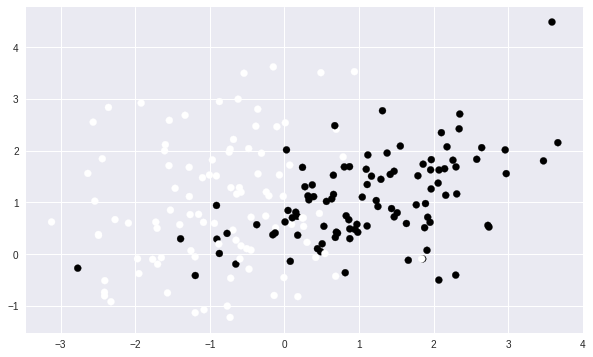

In [2]:
num_outputs = 2
num_inputs = 2
X, y = skds.make_classification(n_samples=200,
                                n_features=num_inputs,
                                n_informative=2,
                                n_redundant=0,
                                n_repeated=0,
                                n_classes=num_outputs,
                                n_clusters_per_class=1,
                                random_state=42)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [3]:
print(y[0:5])
# one-hot coding
y = np.eye(num_outputs)[y]
print(y[0:5])

[1 1 1 1 1]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
X_train, X_test, y_train, y_test = skms.train_test_split(
    X, y, test_size=.4, random_state=42)

In [0]:
tf.reset_default_graph()

num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

learning_rate = 0.001

# inputs
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name="x")
# output
y = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name="y")

# model paramteres
w = tf.Variable(tf.zeros([num_inputs, num_outputs]), name="w")
b = tf.Variable(tf.zeros([num_outputs]), name="b")
# sigmoid here
model = tf.nn.sigmoid(tf.matmul(x, w) + b)

# loss function defined above
loss = tf.reduce_mean(-tf.reduce_sum(
    (y * tf.log(model)) + ((1 - y) * tf.log(1 - model)), axis=1))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(loss)

epoch 0000  accuracy=0.82499999


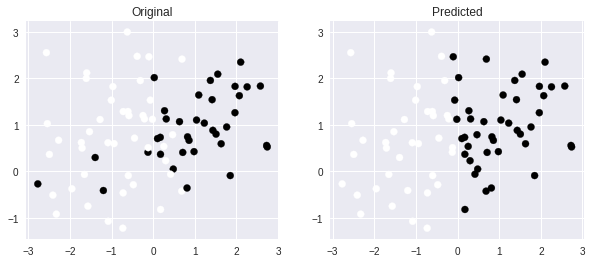

In [7]:
num_epochs = 1

with tf.Session() as tfs:
  tf.global_variables_initializer().run()
  for epoch in range(num_epochs):
    tfs.run(optimizer, feed_dict={x: X_train, y: y_train})
    y_pred = tfs.run(tf.argmax(model, 1), feed_dict={x: X_test})
    y_orig = tfs.run(tf.argmax(y, 1), feed_dict={y: y_test})

    preds_check = tf.equal(y_pred, y_orig)
    accuracy_op = tf.reduce_mean(tf.cast(preds_check, tf.float32))
    accuracy_score = tfs.run(accuracy_op)
    print("epoch {0:04d}  accuracy={1:.8f}".format(epoch, accuracy_score))
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_orig)
    plt.title('Original')
    plt.subplot(1, 2, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred)
    plt.title('Predicted')

It acutally performs pretty good even though a few points are misclassified.

Now if we have more inputs and train the model more epochs,

In [0]:
X, y = skds.make_classification(n_samples=20000,
                                n_features=200,
                                n_informative=200, 
                                n_redundant=0, 
                                n_repeated=0,
                                n_classes=2,
                                n_clusters_per_class=1,
                                random_state=42)
y=np.eye(np.max(y)+1)[y]
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=.4, random_state=42)

In [0]:
tf.reset_default_graph()

num_outputs = y_train.shape[1] 
num_inputs = X_train.shape[1]

learning_rate = 0.001

# inputs
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name="x") 
# output
y = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name="y") 

# model paramteres 
w = tf.Variable(tf.zeros([num_inputs,num_outputs]), name="w")        
b = tf.Variable(tf.zeros([num_outputs]), name="b")             
model = tf.nn.sigmoid(tf.matmul(x, w) + b) 

# loss function
loss = tf.reduce_mean(-tf.reduce_sum( (y * tf.log(model)) + ( (1-y)*tf.log(1-model) ), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [0]:
num_epochs = 20
loss_epochs = np.empty(shape=[num_epochs],dtype=float)
accuracy_epochs = np.empty(shape=[num_epochs],dtype=float)
accuracy_score = 0

with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        tfs.run(optimizer, feed_dict={x: X_train, y: y_train})
        loss_val = tfs.run(loss,feed_dict={x: X_train, y: y_train})
            
        y_pred = tfs.run(tf.argmax(model,1),feed_dict={x: X_test})
        y_orig = tfs.run(tf.argmax(y,1),feed_dict={y: y_test})

        predictions_check = tf.equal(y_pred, y_orig)
        accuracy_function = tf.reduce_mean(tf.cast(predictions_check, tf.float32))
        accuracy_score = tfs.run(accuracy_function)
        accuracy_epochs[epoch] = accuracy_score
        loss_epochs[epoch] = loss_val

We can plot the loss function and accuracy to see the performance.

Text(0,0.5,'Accuracy')

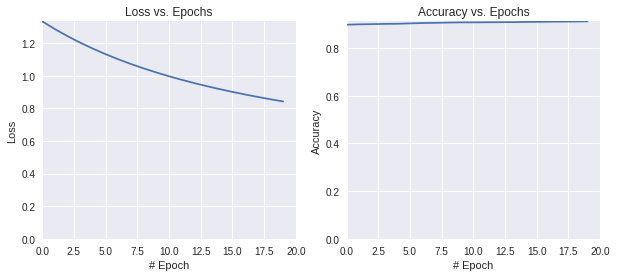

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.axis([0,num_epochs,0,np.max(loss_epochs)])
plt.plot(loss_epochs)
plt.title('Loss vs. Epochs')
plt.xlabel('# Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.axis([0,num_epochs,0,np.max(accuracy_epochs)])
plt.plot(accuracy_epochs)
plt.title('Accuracy vs. Epochs')
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')

##Multiclass classification
Use MNIST data

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist', one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [0]:
num_outputs = 10  # 0-9 digits
num_inputs = 784  # total pixels

learning_rate = 0.001
num_epochs = 1
batch_size = 100
num_batches = int(mnist.train.num_examples/batch_size)

In [0]:
tf.reset_default_graph()

# input images
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name="x")
# output labels
y = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name="y")

# model paramteres
w = tf.Variable(tf.zeros([784, 10]), name="w")
b = tf.Variable(tf.zeros([10]), name="b")
# softmax here
model = tf.nn.softmax(tf.matmul(x, w) + b)

# loss function defined above
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(model), axis=1))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(loss)

In [18]:
with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        for batch in range(num_batches):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            tfs.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        predictions_check = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
        accuracy_function = tf.reduce_mean(
            tf.cast(predictions_check, tf.float32))
        feed_dict = {x: mnist.test.images, y: mnist.test.labels}
        accuracy_score = tfs.run(accuracy_function, feed_dict)
        print("epoch {0:04d}  accuracy={1:.8f}".format(
            epoch, accuracy_score))

epoch 0000  accuracy=0.75989997


To train model in multiple iterations so that it learns with different batches in each iteration, build two supporting functions to help with,

In [0]:
def mnist_batch_func(batch_size=100):
  batch_x, batch_y = mnist.train.next_batch(batch_size)
  return [batch_x, batch_y]

The following function takes the parameters and performs the training iterations

In [0]:
def tensorflow_classification(num_epochs, num_batches, batch_size,
                              batch_func, optimizer, test_x, test_y):
    accuracy_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
    with tf.Session() as tfs:
        tf.global_variables_initializer().run()
        for epoch in range(num_epochs):
            for batch in range(num_batches):
                batch_x, batch_y = batch_func(batch_size)
                feed_dict = {x: batch_x, y: batch_y}
                tfs.run(optimizer, feed_dict)
            predictions_check = tf.equal(
                tf.argmax(model, 1), tf.argmax(y, 1))
            accuracy_function = tf.reduce_mean(
                tf.cast(predictions_check, tf.float32))
            feed_dict = {x: test_x, y: test_y}
            accuracy_score = tfs.run(accuracy_function, feed_dict)
            accuracy_epochs[epoch] = accuracy_score
            print("epoch {0:04d}  accuracy={1:.8f}".format(
                epoch, accuracy_score))

    plt.figure(figsize=(14, 8))
    plt.axis([0, num_epochs, np.min(
        accuracy_epochs), np.max(accuracy_epochs)])
    plt.plot(accuracy_epochs, label='Accuracy Score')
    plt.title('Accuracy over Iterations')
    plt.xlabel('# Epoch')
    plt.ylabel('Accuracy Score')
    plt.legend()

Run this function for 30 epochs,

epoch 0000  accuracy=0.75840002
epoch 0001  accuracy=0.79360002
epoch 0002  accuracy=0.81309998
epoch 0003  accuracy=0.82319999
epoch 0004  accuracy=0.83260000
epoch 0005  accuracy=0.83679998
epoch 0006  accuracy=0.84109998
epoch 0007  accuracy=0.84500003
epoch 0008  accuracy=0.85060000
epoch 0009  accuracy=0.85329998
epoch 0010  accuracy=0.85670000
epoch 0011  accuracy=0.86030000
epoch 0012  accuracy=0.86260003
epoch 0013  accuracy=0.86420000
epoch 0014  accuracy=0.86589998
epoch 0015  accuracy=0.86690003
epoch 0016  accuracy=0.86879998
epoch 0017  accuracy=0.87000000
epoch 0018  accuracy=0.87260002
epoch 0019  accuracy=0.87360001
epoch 0020  accuracy=0.87480003
epoch 0021  accuracy=0.87540001
epoch 0022  accuracy=0.87730002
epoch 0023  accuracy=0.87769997
epoch 0024  accuracy=0.87840003
epoch 0025  accuracy=0.87910002
epoch 0026  accuracy=0.87949997
epoch 0027  accuracy=0.88029999
epoch 0028  accuracy=0.88129997
epoch 0029  accuracy=0.88200003


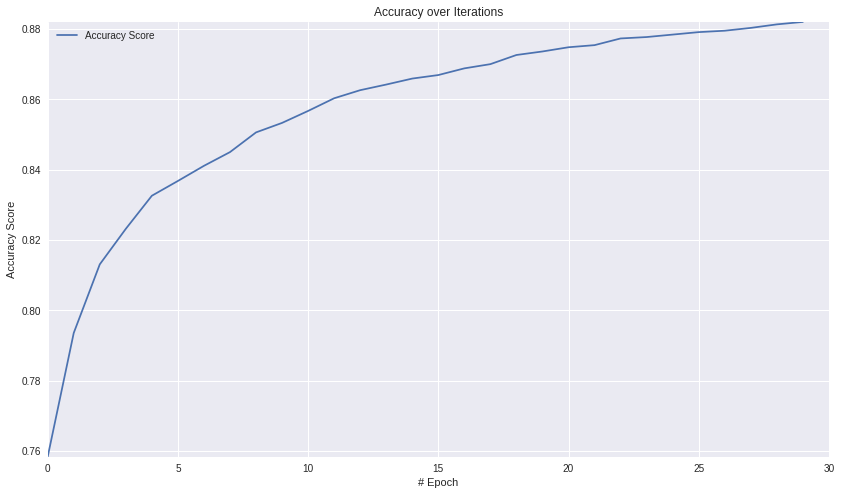

In [21]:
num_epochs=30
tensorflow_classification(num_epochs=num_epochs, 
                          num_batches=num_batches, 
                          batch_size=batch_size, 
                          batch_func=mnist_batch_func, 
                          optimizer=optimizer,
                          test_x=mnist.test.images,test_y=mnist.test.labels)
